Q1. K Nearest Neighbours Algorithm: Go through the resources mentioned in
the slack work space. We will implement this algorithm from beginning without
the help of scikit learn.
1. Load the Data set Download and read the iris flower data set as a csv
file from here.
2. Normalize the Data set Once you read the csv file, try finding the min-
imum and maximum values of each feature. Use these values to normalize
the data. What is Normalization? Use Range normalization aka minmax
normalization (Dont use the inbuilt function).
3. Distance Metric Use the Euclidean distance metric for calculating dis-
tance between 2 arrays. Write a function that calculates the Euclidean
distance between 2 input arrays. This will be later used to calculate the
closeness of any test sample with rest of the records.
4. Nearest Neighbours Use the distance function to get the nearest neigh-
bours for a test record. Write a function that takes in 3 inputs, the dataset,
the test example and the number of neighbours (k). The output of this
function will be a list of k entries in the dataset that are closest to the
test record.
5. Prediction using KNN Write a function that takes 3 inputs, first the
dataset, second a test record and third the number of neighbours. The
output of this function will be to return the label of the test record using
KNN.
6. Test Use the KNN predictor, to classify the following records:
1. [5.1, 2.5, 3.2, 4.3]
2. [4.9, 3, 1.4, 0.2]
3. [6, 3, 4.8, 1.8]
Take k as 5.

In [8]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import scipy.stats
from sklearn.metrics import confusion_matrix,accuracy_score

class_a='Iris_setosa'
class_b='Iris-versicolor'
class_c='Iris-virginica'

#     FUNCTION TO CALCULATE EUCLIDEAN DISTANCE
def eucl_dist(a,b):

  n=4
  d=0
  c=a-b
  for i in range(n):
    d=d+c[i]**2
  return math.sqrt(d)


#     FUNCTION TO DETERMINE K-NEAREST NEIGHBOURS
def knn(df_norm,test_row,k):

  dist={}
  d=[]
  row_n=df_norm.shape[0]
  for i in range(row_n):
    d.append(eucl_dist(df_norm.iloc[i,0:4],test_row)) #calculating euclidean distances with each point
  dist[0]=d
  dist[1]=df_norm[4]
  dist_df=pd.DataFrame(dist)
  dist_df=dist_df.sort_values(by=[0]) #sorting the distances in ascending order
  classes=dist_df.iloc[0:k,1] #taking top k distances
  classes=np.array(classes)
  return classes

#     LOADING  THE DATASET

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None) #loading dataset from given link
df=pd.DataFrame(data)



#     NORMALIZING THE DATASET

df_norm={}
for i in range(4):
  df_norm[i]= ( df[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
df_norm[4]=df[4]
df_norm=pd.DataFrame(df_norm)



#      PREDICTING THE CLASS OF TEST SET 
print('PREDICTED CLASS LABELS:')

print('Test data:1')
test_row=[5.1, 2.5, 3.2, 4.3]
for i in range(len(test_row)):
  test_row[i]=( test_row[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
classes=knn(df_norm,test_row,5)
print('Least 5 distances and their classes')
print(classes)
print('Predicted label:')
print(scipy.stats.mode(classes)[0][0])    # predicting the class with most votes
print()

print('Test data:2')
test_row=[4.9, 3, 1.4, 0.2]
for i in range(len(test_row)):
  test_row[i]=( test_row[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
classes=knn(df_norm,test_row,5)
print('Least 5 distances and their classes')
print(classes)
print('Predicted label:')
print(scipy.stats.mode(classes)[0][0])
print()

print('Test data:3')
test_row=[6, 3, 4.8, 1.8]
for i in range(len(test_row)):
  test_row[i]=( test_row[i] - min(df[i]) ) / ( max(df[i]) - min(df[i]) )
classes=knn(df_norm,test_row,5)
print('Least 5 distances and their classes')
print(classes)
print('Predicted label:')
print(scipy.stats.mode(classes)[0][0])   
print()

PREDICTED CLASS LABELS:
Test data:1
Least 5 distances and their classes
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
Predicted label:
Iris-virginica

Test data:2
Least 5 distances and their classes
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
Predicted label:
Iris-setosa

Test data:3
Least 5 distances and their classes
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Predicted label:
Iris-virginica



7. Accuracy Use the same KNN predictor to find the labels of the training
data. Report the accuracy for each class. You can use confusion matrix
to visualize the result (not necessary).
8. Tuning Use the KNN predictor on the dataset for different values of k.
Calculate the accuracy for different values of k and see which k gives the
maximum accuracy. This is known as hyperparameter tuning. Are there
different ways of choosing k?

In [11]:
# THIS IS DONE USING THE WHOLE DATASET AS BOTH TRAIN-SET AND TEST-SET 

import random

#     PREDICTING TRAINING SET ACCURACY


df_train=df_norm
df_test=df_norm

k=5
print(f'Training accuracy for k = {k}:')
test_length=50*3    # 15 from each class
y_pred=[] #predicted labels
y_true=[] #true labels
for i in range(test_length):
  y_pred.append(scipy.stats.mode(knn(df_train,df_test.iloc[i,0:4],k))[0][0])
  y_true.append(df_test.iloc[i,4])
y_true=np.array(y_true)
y_pred=np.array(y_pred)

#print(y_true)
#print(y_pred)
acc=np.mean(y_true==y_pred)
print('Overall accuracy:')
print(acc)
print()
print('Confusion Matrix:')
cm=confusion_matrix(y_true,y_pred)
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_acc=cm.diagonal()
print('Accuracy for Iris-setosa',end=' ')
print(class_acc[0])
print('Accuracy for Iris-versicolor',end=' ')
print(class_acc[1])
print('Accuracy for Iris-virginica',end=' ')
print(class_acc[2])
print()

print()
print('Training accuracies for different values of k')
for k in range(1,15):
  print(f'FOR K = {k}:')
  test_length=50*3    # 15 from each class
  y_pred=[]
  y_true=[]
  for i in range(test_length):
    y_pred.append(scipy.stats.mode(knn(df_train,df_test.iloc[i,0:4],k))[0][0])
    y_true.append(df_test.iloc[i,4])
  y_true=np.array(y_true)
  y_pred=np.array(y_pred)

  acc=np.mean(y_true==y_pred)
  print(acc)
  print()
  #print('Confusion Matrix:')
  #display(confusion_matrix(y_true,y_pred))

Training accuracy for k = 5:
Overall accuracy:
0.96

Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Accuracy for Iris-setosa 1.0
Accuracy for Iris-versicolor 0.96
Accuracy for Iris-virginica 0.92


Training accuracies for different values of k
FOR K = 1:
1.0

FOR K = 2:
0.9733333333333334

FOR K = 3:
0.9666666666666667

FOR K = 4:
0.96

FOR K = 5:
0.96

FOR K = 6:
0.9666666666666667

FOR K = 7:
0.9666666666666667

FOR K = 8:
0.9666666666666667

FOR K = 9:
0.9733333333333334

FOR K = 10:
0.9666666666666667

FOR K = 11:
0.96

FOR K = 12:
0.9666666666666667

FOR K = 13:
0.9733333333333334

FOR K = 14:
0.9666666666666667



When taking the whole dataset, of course k=1 will give accuracy 1.00. For every point in test-set we can always get the original point in the train-set also, which would give a euclidean distance = 0. Therefore it will always be the minimum distance.

Other values of k may or may not give accuracy 1.00.

As in this case, we can see the next highest accuracies are for k=2, 9, 13.

In [13]:
# THIS IS DONE BY SPLITTING THE WHOLE DATASET CLASSWISE RANDOMLY IN THE RATIO 7:3

import random

#      SPLITTING into train and test set

# for each class, we are choosing randomly 35 out of the 50 (70 %) rows for training; the 150 rows are sorted according to labels  
randomlist1_train = random.sample(range(0, 49), 35)
randomlist2_train = random.sample(range(50, 99), 35)
randomlist3_train = random.sample(range(100, 149), 35)

df=df_norm
df1_train=df.loc[randomlist1_train,:]
df2_train=df.loc[randomlist2_train,:]
df3_train=df.loc[randomlist3_train,:]

frames=[df1_train,df2_train,df3_train]
df_train=pd.concat(frames)        # concatenating into a single train set

# choosing the rest 15 out of 50 rows for testing the classifier
randomlist1_test=[x for x in list(range(50)) if x not in randomlist1_train]
randomlist2_test=[x for x in list(range(50,100)) if x not in randomlist2_train]
randomlist3_test=[x for x in list(range(100,150)) if x not in randomlist3_train]

df1_test=df.loc[randomlist1_test,:]
df2_test=df.loc[randomlist2_test,:]
df3_test=df.loc[randomlist3_test,:]

frames2=[df1_test,df2_test,df3_test]
df_test=pd.concat(frames2)         # concatenating into a single test set


#     PREPARE  X and y test data
X_data = df_test.iloc[:,0:4]    # features are the first 4 columns and label is the last column
y_labels = df_test.iloc[:,4]


#     PREDICTING TRAINING SET ACCURACY

k=5
print(f'Training accuracy for k = {k}:')
test_length=15*3    # 15 from each class
y_pred=[]
y_true=[]
for i in range(test_length):
  y_pred.append(scipy.stats.mode(knn(df_train,df_test.iloc[i,0:4],k))[0][0])
  y_true.append(df_test.iloc[i,4])
y_true=np.array(y_true)
y_pred=np.array(y_pred)

#print(y_true)
#print(y_pred)
acc=np.mean(y_true==y_pred)
print('Overall accuracy:')
print(acc)
print()
print('Confusion Matrix:')
cm=confusion_matrix(y_true,y_pred)
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_acc=cm.diagonal()
print('Accuracy for Iris-setosa',end=' ')
print(class_acc[0])
print('Accuracy for Iris-versicolor',end=' ')
print(class_acc[1])
print('Accuracy for Iris-virginica',end=' ')
print(class_acc[2])
print()

print()
print('Training accuracies for different values of k')
for k in range(1,15):
  print(f'FOR K = {k}:')
  test_length=15*3    # 15 from each class
  y_pred=[]
  y_true=[]
  for i in range(test_length):
    y_pred.append(scipy.stats.mode(knn(df_train,df_test.iloc[i,0:4],k))[0][0])
    y_true.append(df_test.iloc[i,4])
  y_true=np.array(y_true)
  y_pred=np.array(y_pred)

  acc=np.mean(y_true==y_pred)
  print(acc)
  print()
  #print('Confusion Matrix:')
  #display(confusion_matrix(y_true,y_pred))


Training accuracy for k = 5:
Overall accuracy:
0.9777777777777777

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy for Iris-setosa 1.0
Accuracy for Iris-versicolor 1.0
Accuracy for Iris-virginica 0.9333333333333333


Training accuracies for different values of k
FOR K = 1:
0.9777777777777777

FOR K = 2:
0.9777777777777777

FOR K = 3:
0.9777777777777777

FOR K = 4:
0.9555555555555556

FOR K = 5:
0.9777777777777777

FOR K = 6:
0.9555555555555556

FOR K = 7:
0.9555555555555556

FOR K = 8:
0.9555555555555556

FOR K = 9:
0.9555555555555556

FOR K = 10:
0.9555555555555556

FOR K = 11:
0.9777777777777777

FOR K = 12:
0.9777777777777777

FOR K = 13:
0.9777777777777777

FOR K = 14:
0.9555555555555556



The highest accuracy on the training set was 0.9777777777777777 obtained for k = 1,2,3,5,11,12,13 but these values vary with every run as test set is randomly chosen from the entire dataset. Through trial and error, it is seen that most of the even k values do not give the best results.

Q2. K Means Algorithm: Go through the material on K Means shared in the
work space. K Means is a very powerful algorithm for initial analysis of data
as well as clustering. There are different types of k means but we will focus on
the most basic one.
1. Dataset Load the dataset and read it as a csv file from here.
2. Visualization Plot the dataset using matplotlib.
3. K Means Algorithm Use the inbuilt algorithm for K Means in scikit
learn. Vary k from 2 to 10 and plot the clusters in different colours to
visualize.
From the plots, which value of k is the most appropriate for this dataset.

In [ ]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import scipy.stats
from sklearn.metrics import confusion_matrix,accuracy_score

#   LOADING THE DATASET INTO A DATAFRAME
data=pd.read_csv('https://raw.githubusercontent.com/snehilsanyal/EE524/master/Assignments/dataset.csv')
df=pd.DataFrame(data)


In [ ]:
#   EXTRACTING THE TWO FEATURES
x=df['feature1']
y=df['feature2']

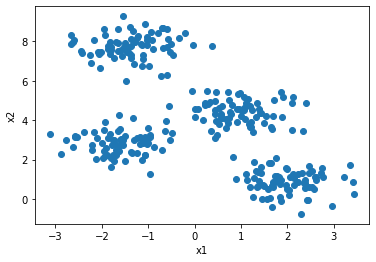

In [ ]:
#   PLOTTING THE TWO FEATURES
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

FOR K=2


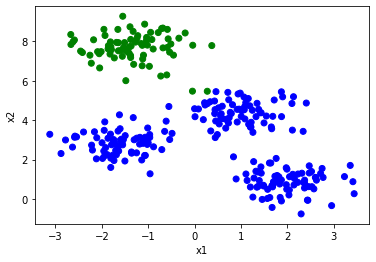

FOR K=3


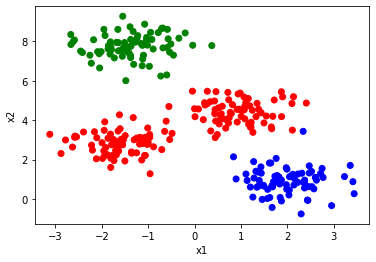

FOR K=4


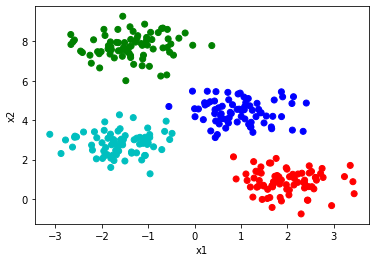

FOR K=5


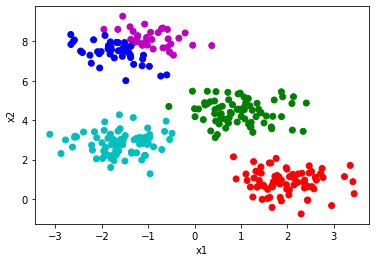

FOR K=6


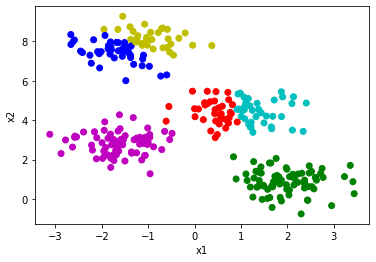

FOR K=7


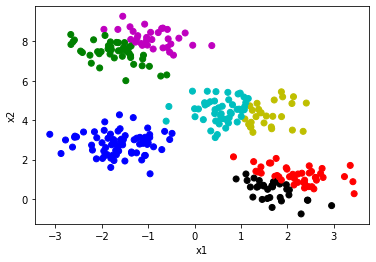

FOR K=8


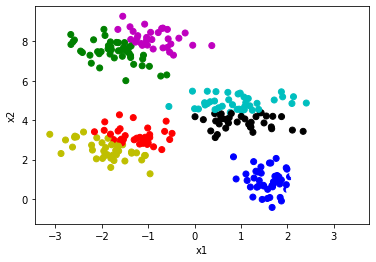

FOR K=9


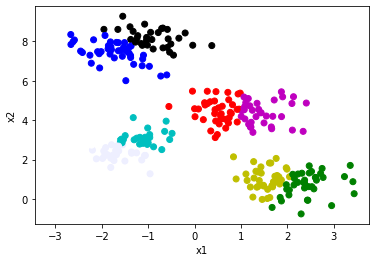

FOR K=10


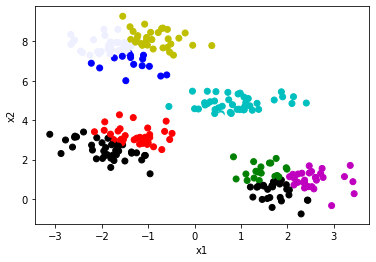

In [ ]:
#   USING INBUILT KMEANS FUNCTION
from sklearn.cluster import KMeans
X=np.ndarray((300,2))   #a numpy array to hold the feature values for giving input to the function for k-means clustering
for i in range(300):    #extracting the values x1, x2
    X[i][0]=x[i]      
    X[i][1]=y[i]

#  creating a colour map for the 9 plots  
colours=['b','g','r','c','m','y','k','w','#eeefff']

for k in range(2,11):   #iterating over k= 2 to 10
  print(f'FOR K={k}')
  kmeans=KMeans(n_clusters=k, random_state=None).fit(X) #clustering
  color_map=[]
  for i in list(kmeans.labels_):  #allocating colour to each point according to the cluster it was assigned
    color_map.append(colours[i])
  #print(color_map)
  plt.scatter(x,y,c=color_map)  #plotting the clusters
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()


From the plots, the clustering seems best for k=4.